# Unit #2 Code: Regression Basics

In this notebook, we will learn how to perform multiple linear regression in R and interpret some of the output.

## Problem #1

Tobias Mayer collected data on the locations of various landmarks on the moon, including the Manilius crater, as they moved relative to earth. He derived an equation describing the motion of the moon (called liberation) taking the form $$arc = \beta_0 + \beta_1 sinang + \beta_2 cosang.$$

Mayer had measurements of sinang, cosang, and arc, and wished to obtain values for $\beta_j$, $j=0,1,2$. 

#### (a) Using the code below, load the data, and explore it. Does there appear to be a linear relationship between arc (the response) and either singang or cosang?

arc,sinang,cosang,group
13.16667,0.8836,-0.4682,1
13.13333,0.9996,-0.0282,1
13.20000,0.9899,0.1421,1
14.25000,0.2221,0.9750,3
14.70000,0.0006,1.0000,3
13.01667,0.9308,-0.3654,1


[1] -0.9905529

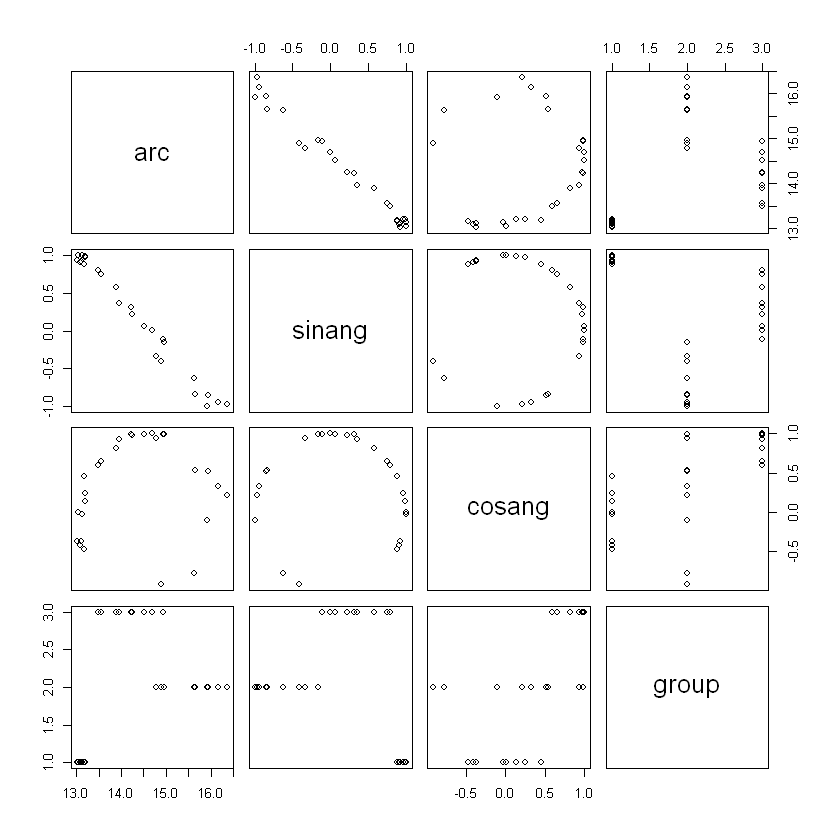

In [8]:
#install.packages("faraway", dependencies = TRUE)
library(faraway)
data(manilius)
head(manilius)
plot(manilius)
with(manilius, cor(sinang, arc))

#### (b) Perform simple linear regression with arc as the response and sinang as the predictor using the lm() function. Use the summary function to print a summary of the model. Report and interpret the coefficient of determination.

In [12]:
#lmod = lm(response ~ predictor + predictor2 + ..., data = nameofdataframe)
lmod = lm(arc ~ sinang, data = manilius) # Fits the model
summary(lmod)


Call:
lm(formula = arc ~ sinang, data = manilius)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31850 -0.08576  0.04563  0.10836  0.29629 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.59329    0.03105  470.06   <2e-16 ***
sinang      -1.51217    0.04187  -36.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1555 on 25 degrees of freedom
Multiple R-squared:  0.9812,	Adjusted R-squared:  0.9804 
F-statistic:  1304 on 1 and 25 DF,  p-value: < 2.2e-16


$R^2 = 0.9804$. This means that roughly 98% of the variability in arc can be explained by sinang.

#### (c) Compute:

1. The hat matrix for the model from scratch (e.g., using functions like model.matrix() to obtain the design matrix $X$, solve() to compute an inverse, %*% for matrix multiplication, and t() for transpose). 
2. The sum of the diagonals of the hat matrix. 
3. Then, note that lm.influence(NameOfModel)$hat gives the diagonals of the hat matrix. 
4. Print the residuals of the model, using resid().
5. What is the sum of the residuals? Do you think it will always be that value? If so, can you prove it?

Note: Above I had you compute a matrix inverse. In practice, [rarely is it a good idea to compute the inverse of a matrix](https://www.johndcook.com/blog/2010/01/19/dont-invert-that-matrix/)  (it's expensive!). There are fancy ways around inverse computation.

In [14]:
# Compute matrix X
X = model.matrix(lmod)
# Compute Hat Matrix. Recall H = X(X^TX)^-1X^T then sum of the diagonals of hat matrix
sum(diag(X %*% solve(t(X) %*% X) %*% t(X)))
# Do the same calculation with lm.influence(NameOfModel)$hat
sum(lm.influence(lmod)$hat)
# Print the residuals
print(resid(lmod))
# Print the sum of the residuals
sum(resid(lmod))

[1] 2

[1] 2

           1            2            3            4            5            6 
-0.090477374  0.051600435  0.103599101 -0.007441206  0.107614240 -0.169103185 
           7            8            9           10           11           12 
 0.014405943  0.119297032 -0.134343201 -0.047794699  0.071843636 -0.067459615 
          13           14           15           16           17           18 
 0.114906987  0.160291248 -0.081037250  0.109113866  0.178541050 -0.318500824 
          19           20           21           22           23           24 
 0.045627012  0.100074729 -0.181533026 -0.214872629  0.130886538  0.296290810 
          25           26           27 
 0.093122535 -0.311919771 -0.072732381 


[1] -1.621966e-16

#### (d) Interpret the estimates of the parameters in the model.

Based on the model, arc will change by $-1.512$ for every $1$ unit increase in sinang. The intercept lies at 14.593.

#### (e) Plot the data and add the SLR line and the mean of the response without considering the predictor (this is just a horizontal line). Choose a single $x$ value, and be able to identify the three deviations discussed in class (explained deviation, residual deviation, and total deviation).

Challenge: try doing this plot with ggplot! geom_smooth() and geom_hline() might help.

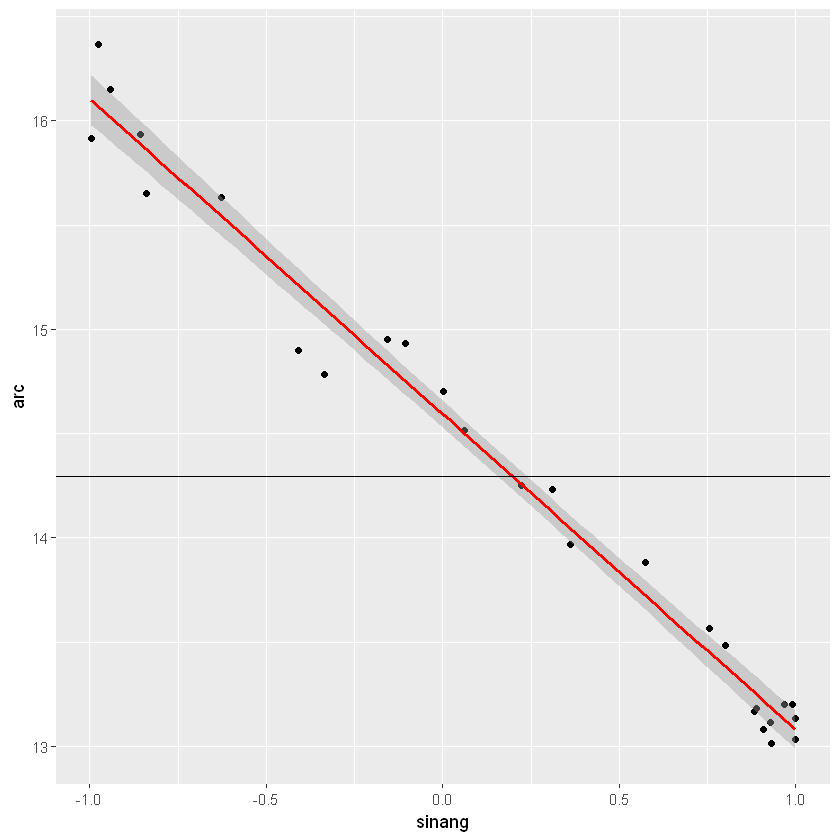

In [21]:
library(ggplot2)
p = ggplot(data = manilius) + geom_point(mapping = aes(x = sinang, y = arc))
p = p + geom_smooth(data = manilius, formula = y ~ x, method = lm, color = '2', aes(x = sinang,y = arc, group = 1), se = TRUE)
p = p + geom_hline(mapping = aes(yintercept = mean(arc)))
p

## Problem #2

#### (a) Now perform MLR, adding cosang to the model. Use the summary function to print a summary of the model. 

In [22]:
#lmod = lm(response ~ predictor1 + predictor2, data = nameofdataframe)
lmod2 = lm(arc ~ sinang + cosang, data = manilius)
summary(lmod2)



Call:
lm(formula = arc ~ sinang + cosang, data = manilius)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37033 -0.07810  0.03655  0.07960  0.31581 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.56162    0.03411 426.846   <2e-16 ***
sinang      -1.50458    0.04013 -37.490   <2e-16 ***
cosang       0.09137    0.04890   1.868    0.074 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1483 on 24 degrees of freedom
Multiple R-squared:  0.9836,	Adjusted R-squared:  0.9822 
F-statistic:   719 on 2 and 24 DF,  p-value: < 2.2e-16


#### (b)  Compute the sum of the diagonals of the hat matrix. Compare it to the sum of the diagonals of the hat matrix in problem #1. Can you hypothesize what the sum of the diagonals of the hat matrix will always be?

In [24]:
sum(lm.influence(lmod2)$hat)

[1] 3

It appears that the sum of the diagonals of the hat matrix is always p+1.

#### (c) Plot the residuals of the model ($y$) against the fitted values ($x$). What do you notice about where they are centered? Does the variability in the residuals change as a function of the fitted values?

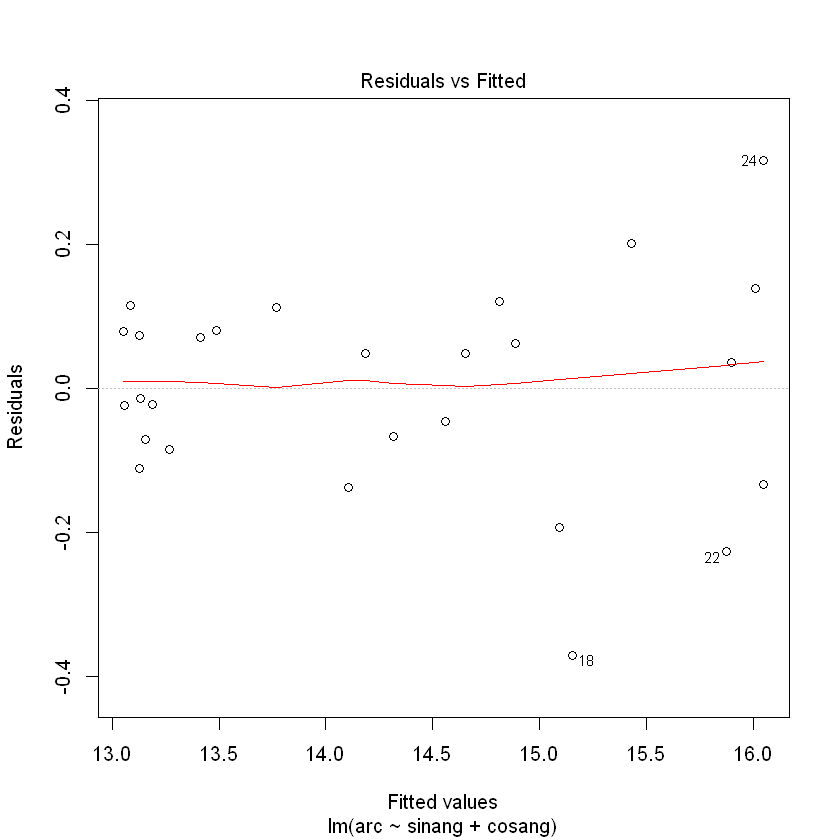

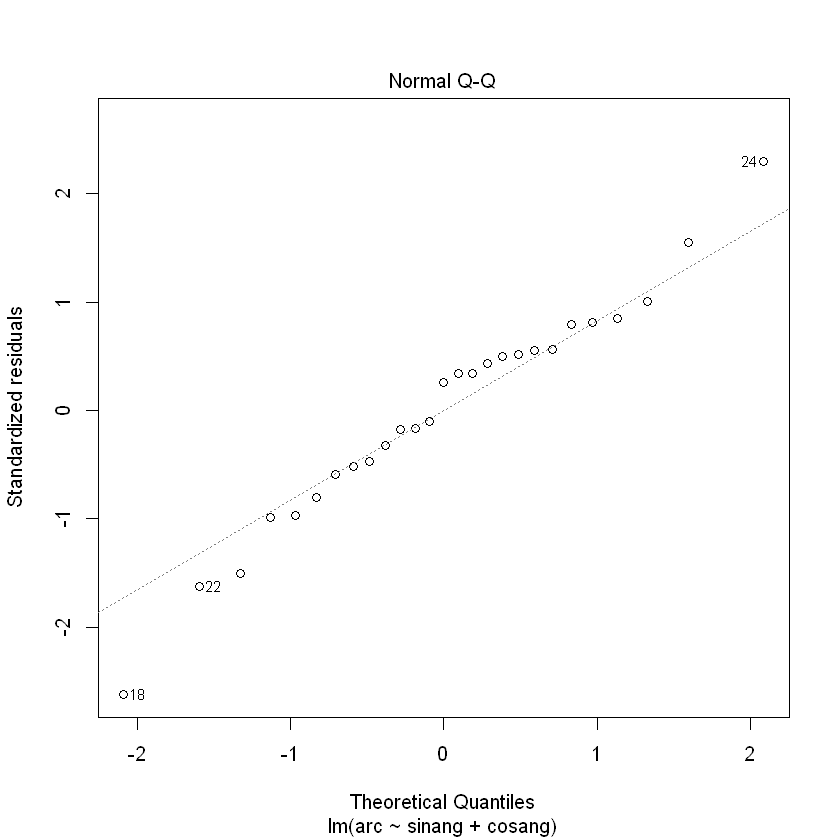

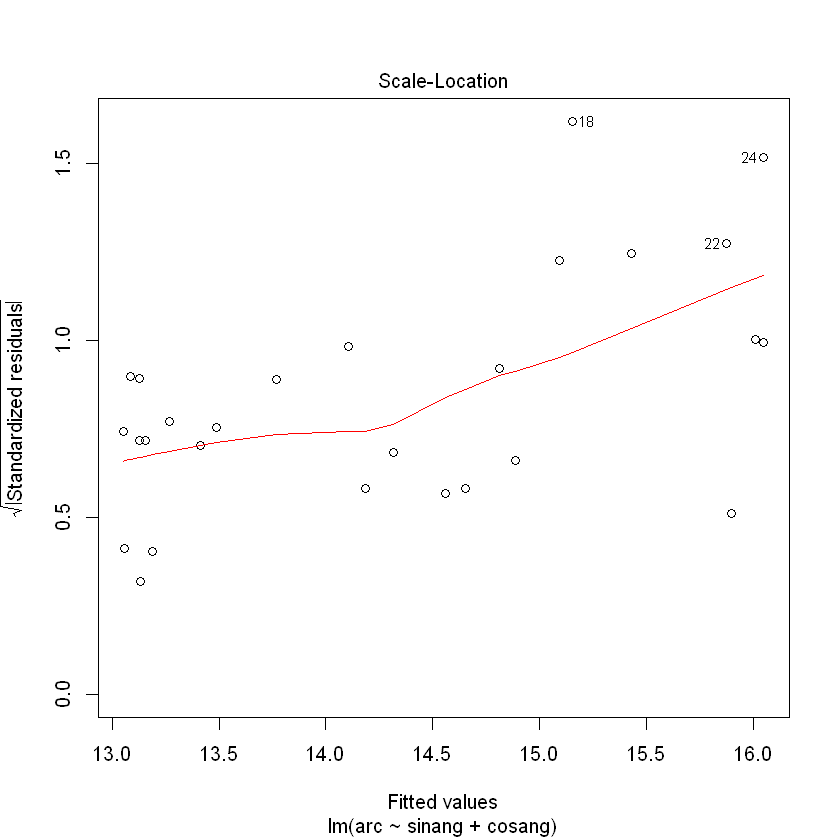

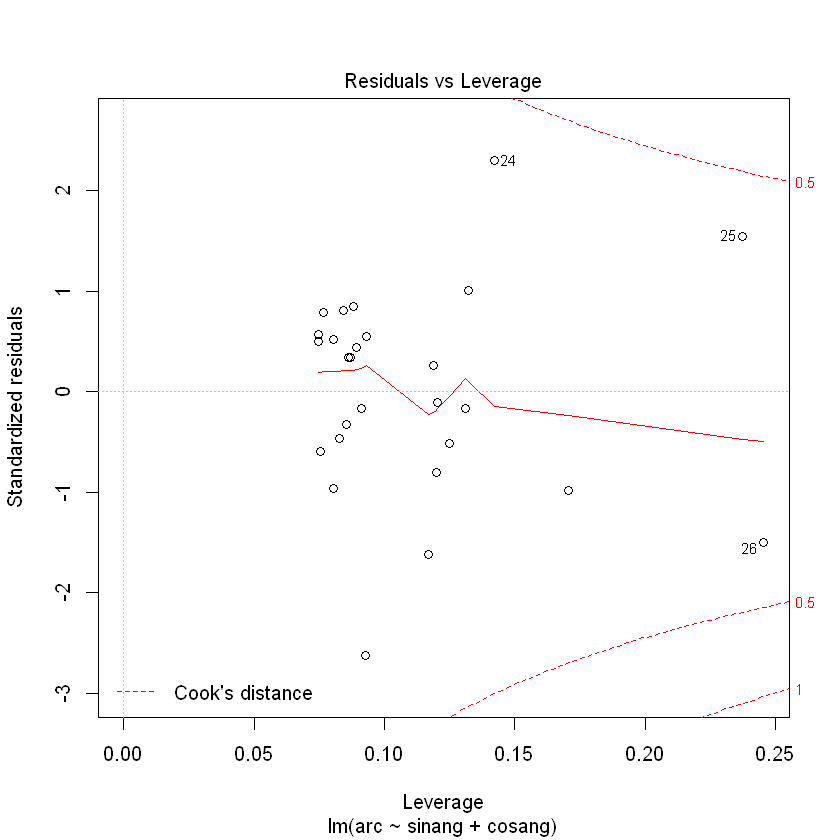

In [26]:
plot(lmod2)

The residuals are centered at zero and spread in both positive and negative directions. This makes sense because the expected value of the error is 0, and (if it follows the model) spreads by $\sigma^2$. However, it does appear that the variance increases as fitted values increase so it might not be a constant variance and involve an issue with the model.

#### (d) Interpret the estimates of the parameters in the model.

Arc will increase by 0.091 for each unit increase in cosang if sinang stays constant. Arc will decrease by 1.505 for each unit increase in sinang if cosang stays constant.

#### (e) Add a new predictor to the manilius dataframe: $cosang2 = 2\times cosang$. Then, run multiple linear regression using all three predictors. Print a summary. Why is the estimate for cosang2 NA? 

In [7]:
manilius$cosang2 = manilius$cosang * 2
lmod3 = lm(arc ~ sinang + cosang + cosang2, data = manilius)
summary(lmod3)


Call:
lm(formula = arc ~ sinang + cosang + cosang2, data = manilius)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37033 -0.07810  0.03655  0.07960  0.31581 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.56162    0.03411 426.846   <2e-16 ***
sinang      -1.50458    0.04013 -37.490   <2e-16 ***
cosang       0.09137    0.04890   1.868    0.074 .  
cosang2           NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1483 on 24 degrees of freedom
Multiple R-squared:  0.9836,	Adjusted R-squared:  0.9822 
F-statistic:   719 on 2 and 24 DF,  p-value: < 2.2e-16


Cosang2 is NA because it is a constant multiple of cosang, so it is not independent of the other data. 

#### (f) Add another new predictor to the manilius dataframe: $cosang3 = 2\times cosang + \gamma$, where $\gamma \sim N(0,10^{-4})$. Then, run multiple linear regression using sinang, cosang, and cosang3 as predictors. Print a summary. What do you notice about the standard error column for cosang and cosang3? 

In [30]:
manilius$cosang3 = manilius$cosang*2 + rnorm(length(manilius$cosang), 0, 0.0001)
lmod4 = lm(arc ~ sinang + cosang + cosang3, data = manilius)
summary(lmod4)


Call:
lm(formula = arc ~ sinang + cosang + cosang3, data = manilius)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35622 -0.08952  0.04200  0.07820  0.30826 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   14.56387    0.03499 416.285   <2e-16 ***
sinang        -1.50188    0.04117 -36.476   <2e-16 ***
cosang      -240.88503  500.34472  -0.481    0.635    
cosang3      120.48611  250.16802   0.482    0.635    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1507 on 23 degrees of freedom
Multiple R-squared:  0.9837,	Adjusted R-squared:  0.9816 
F-statistic:   464 on 3 and 23 DF,  p-value: < 2.2e-16


The standard errors for cosang and cosang3 are very high. This means that there is likely something in the model that is very correlated with it, in this case with each other. We want our features to have a little correlation as possible to best interpret the data.